<a href="https://colab.research.google.com/github/Topein/Projeto-1-Bootcamp-Data-Science/blob/main/Projeto_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Módulo 01 - Bootcamp Data Science 3

# Introdução
>  O Brasil está em 12º no ranking da econômia mundial. Apesar dessa colocação e tendo em vista que é um país subdesenvolvido, entendemos que há uma grande divisão socioeconômica. No sistema de saúde isso não é diferente onde apenas 30% da população optou pelo plano de saúde enquanto que os outros 70% dependem do Sistema Único de Saúde (SUS).

> Escolhi esse tema para comparar a efetividade do nosso sistema de saúde público em relação ao privado.

# Objetivo
> Analisar a efetividade dos hospitais públicos e particulares pela taxa de mortalidade seguida de uma internação e tempo médio da mesma.

# Análises

*   Verificar a média da taxa de mortalidade por região
*   Granularizar a análise por estado, comparando Público x Particular
*   Finalizar com uma comparação entre tempo médio de internação em Hospítais Públicos e Particulares

# Referencias
https://saude.zelas.com.br/artigos/hospitais-no-brasil
https://datasus.saude.gov.br/informacoes-de-saude-tabnet/






In [174]:
#Importando as Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# 1º Parte da análise - Taxa de mortalidade


> Vou começar importando os dados de taxa de mortalidade seguidos de internação dos hospitais públicos e particulares



In [175]:
#Importando os dados de taxa de mortalidade de hospitais públicos seguidos de internação 

URL = 'https://raw.githubusercontent.com/Topein/Projeto-1-Bootcamp-Data-Science/main/Dados/Taxa_Mortalidade_Publica.csv'
taxa_mortalidade_publica = pd.read_csv(URL, encoding="ISO-8859-1",
                    skiprows = 4, sep=";",skipfooter= 12, 
                    thousands= ".", decimal= ",",index_col=0, engine = 'python').drop('Total', axis=1) #Setando o índice e excluindo a Coluna total, 

#Tratando os dados Importados

taxa_mortalidade_publica = taxa_mortalidade_publica.replace('-', np.nan) #substituindo os dados '-' Inexistentes por Nulos (nan)
taxa_mortalidade_publica = taxa_mortalidade_publica.astype('float64') #mudando tudo para float64

taxa_mortalidade_publica.head()


,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,2013/Nov,2013/Dez,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,2014/Out,2014/Nov,2014/Dez,2015/Jan,2015/Fev,2015/Mar,2015/Abr,2015/Mai,2015/Jun,2015/Jul,2015/Ago,2015/Set,2015/Out
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1.43,1.41,1.07,1.04,1.23,1.26,1.47,1.58,1.45,1.83,1.33,1.30,1.55,1.27,1.43,1.63,1.20,1.61,1.61,1.54,1.49,1.62,1.85,1.28,1.72,1.22,1.23,1.51,1.71,1.97,2.12,2.38,2.98,2.03,1.82,2.01,2.13,1.60,1.96,1.98,...,2.78,2.45,2.44,2.23,2.34,2.42,2.64,2.56,2.43,2.72,2.95,2.52,2.18,2.34,2.55,2.41,2.12,1.72,2.53,2.63,2.48,2.84,2.64,2.83,2.73,2.49,2.25,2.54,2.41,2.56,2.51,2.97,2.49,2.39,3.12,2.62,2.91,2.72,2.69,3.22
12 Acre,1.90,3.73,2.41,3.16,3.18,2.21,2.88,3.29,2.57,2.16,1.49,1.79,3.54,2.76,2.57,2.53,2.75,2.06,2.31,2.17,nan,3.19,2.94,3.04,2.72,2.16,3.54,3.41,2.72,2.85,2.49,3.38,3.83,4.37,2.69,3.52,3.54,3.30,2.54,3.66,...,3.02,2.74,2.03,2.82,3.07,2.65,2.62,3.76,2.64,3.10,2.93,2.03,3.73,2.87,2.86,2.64,2.40,2.29,2.10,1.82,1.67,2.32,2.46,2.55,3.56,2.67,3.05,2.90,3.04,3.09,3.97,1.92,3.46,3.27,3.13,3.72,3.87,3.25,3.54,2.58
13 Amazonas,1.76,1.99,2.23,2.29,1.98,1.96,1.97,1.87,1.78,1.63,1.35,1.72,2.14,1.60,1.33,2.22,2.10,2.39,2.12,2.47,2.33,2.01,2.21,2.21,2.12,1.64,1.86,1.82,1.87,2.45,1.82,2.32,2.41,1.94,2.11,1.80,2.18,2.69,2.43,2.56,...,2.61,2.30,2.18,2.44,2.31,2.58,2.39,2.58,2.45,2.63,2.42,2.42,1.43,2.42,2.01,2.23,2.28,2.11,2.34,2.12,2.09,1.84,2.67,1.70,2.07,2.04,2.01,2.12,1.80,1.78,1.93,2.34,2.36,2.22,2.14,2.45,2.75,2.35,2.70,2.41
14 Roraima,1.56,1.16,1.27,1.93,1.28,1.18,1.65,1.35,1.78,2.43,1.20,1.61,2.24,1.88,1.23,1.75,1.31,2.26,1.27,2.08,1.57,2.89,2.01,2.31,2.54,2.57,2.05,1.86,2.24,2.13,2.27,2.11,2.79,3.14,2.87,2.74,2.52,1.62,2.05,2.08,...,2.14,2.29,2.28,2.38,1.61,2.25,2.59,1.87,2.50,1.75,1.44,1.97,1.50,2.25,1.98,1.43,1.75,1.09,1.88,1.66,1.84,1.73,1.88,1.77,2.20,2.59,2.34,2.11,2.05,1.65,1.98,3.08,2.28,2.56,2.68,1.99,2.38,2.81,1.74,1.82
15 Pará,2.26,2.16,2.49,2.05,2.24,2.28,2.71,2.42,2.69,2.31,2.30,2.70,3.05,2.92,2.66,2.59,2.77,2.55,2.65,2.51,2.75,2.45,2.73,2.53,3.23,2.77,2.60,2.67,2.44,2.70,3.06,3.05,2.83,2.76,2.89,2.80,2.99,2.98,2.85,2.50,...,2.80,2.66,3.32,3.10,3.02,3.46,3.30,3.08,2.95,2.79,2.87,3.12,2.88,2.82,3.03,2.82,3.07,2.75,2.93,2.96,3.09,2.83,3.03,3.15,3.11,2.52,3.23,2.84,3.15,2.95,2.91,3.19,3.27,3.39,3.04,3.11,3.04,3.20,3.23,2.97


In [176]:
#Importando os dados de taxa de mortalidade de hospitais particulares seguidos de internação 

URL = 'https://raw.githubusercontent.com/Topein/Projeto-1-Bootcamp-Data-Science/main/Dados/Taxa_Mortalidade_Privada.csv'
taxa_mortalidade_privada = pd.read_csv(URL, encoding="ISO-8859-1",
                    skiprows = 4, sep=";",skipfooter= 12, 
                    thousands= ".", decimal= ",", index_col=0, engine= 'python').drop('Total', axis=1) #Setando o índice e excluindo a Coluna total, 

#Tratando os dados Importados

taxa_mortalidade_privada = taxa_mortalidade_privada.replace('-', np.nan) #substituindo os dados '-' Inexistentes por Nulos (nan)
taxa_mortalidade_privada = taxa_mortalidade_privada.astype('float64') #mudando tudo para float64


taxa_mortalidade_privada.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,2013/Nov,2013/Dez,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,2014/Out,2014/Nov,2014/Dez,2015/Jan,2015/Fev,2015/Mar,2015/Abr,2015/Mai,2015/Jun,2015/Jul,2015/Ago,2015/Set,2015/Out
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,nan,nan,nan,nan,nan,nan,0.43,nan,nan,nan,0.31,nan,1.89,nan,nan,nan,0.28,nan,0.27,nan,nan,nan,nan,nan,0.30,1.10,5.54,2.34,7.12,3.25,5.20,2.63,4.76,2.28,3.95,5.10,2.63,5.09,2.17,6.00,...,2.10,2.26,2.48,4.07,2.78,3.79,4.35,3.52,6.98,4.73,5.63,5.85,6.06,5.84,3.47,2.83,4.66,5.28,2.78,5.06,5.40,4.42,3.72,4.07,2.62,1.68,2.49,1.57,3.77,3.84,0.72,2.65,1.88,2.81,2.95,3.54,3.23,3.08,4.86,4.66
12 Acre,0.56,1.22,0.68,1.33,0.62,0.40,0.60,0.47,0.98,0.63,0.97,0.78,1.22,0.25,0.93,0.58,0.45,0.88,1.64,0.68,nan,0.81,0.72,0.27,1.19,0.86,0.68,1.04,1.44,1.22,0.74,1.21,0.53,0.97,1.22,0.77,0.90,1.07,1.14,1.29,...,1.00,0.73,0.83,1.39,1.22,0.38,0.94,0.86,1.29,1.26,0.25,1.45,0.83,1.12,0.97,0.54,1.04,0.57,0.64,0.56,0.84,0.29,0.34,0.80,0.72,1.12,0.93,1.67,1.64,1.89,1.32,0.96,0.82,1.29,1.82,1.03,2.05,1.39,1.53,1.35
13 Amazonas,nan,1.01,0.85,1.24,0.78,1.34,0.47,1.18,0.38,0.80,0.12,0.82,1.46,0.62,0.63,0.63,1.63,1.09,1.49,0.95,1.33,1.58,0.58,0.83,0.71,1.44,0.86,1.11,1.50,1.81,1.49,1.85,1.02,0.15,1.68,2.70,2.84,1.71,1.70,2.28,...,0.49,2.41,3.67,1.72,1.02,0.56,2.31,1.35,1.96,2.55,1.06,1.13,1.41,1.62,2.19,2.36,0.86,1.28,2.54,2.38,1.88,2.74,3.16,1.58,2.41,1.40,1.68,2.02,1.83,2.12,1.78,2.38,2.80,2.40,2.06,2.53,2.47,2.41,2.38,1.49
14 Roraima,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.60,nan,nan,nan
15 Pará,0.83,0.77,0.70,0.63,0.68,0.75,0.75,0.76,0.95,0.96,0.57,0.47,0.53,0.57,0.62,0.74,0.78,0.68,0.73,0.68,0.73,0.80,0.67,0.57,0.67,0.59,0.62,0.63,0.57,0.68,0.62,0.77,0.67,0.73,0.67,0.54,0.65,0.60,0.77,0.76,...,0.90,1.00,0.86,0.79,0.87,0.92,0.84,0.78,0.81,0.75,0.72,0.85,0.84,0.91,0.92,0.82,0.87,0.77,0.92,0.86,0.88,0.93,0.85,0.95,0.80,1.02,0.86,0.88,0.80,0.88,0.90,1.07,0.97,0.91,1.04,1.01,1.04,1.13,0.86,0.89


### Para facilitar a análise vou acrescentar a coluna região e organizar os dados pela média decrescente dos anos a fim de escolher a região com menor e maior taxa de mortalidade. Buscando posteriormente granularizar a análise por estados em destaque.

In [177]:
#Incluindo a Região nas taxas de mortalidade de hospitais públicos
taxa_mortalidade_publica_usaveis = taxa_mortalidade_publica.mean().index.to_list()
taxa_publica_usaveis = taxa_mortalidade_publica[taxa_mortalidade_publica_usaveis]

regiao = {
    1: 'Norte',
    2: 'Nordeste',
    3: 'Sudeste',
    4: 'Sul',
    5: 'Centro-Oeste'
}

taxa_publica_usaveis.insert(0, 'Região','')
taxa_publica_usaveis['Região'] = taxa_publica_usaveis.index.str[0].astype(int)

taxa_publica_usaveis['Região'] = taxa_publica_usaveis['Região'].map(regiao)
taxa_publica_usaveis.head()

,Região,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,2013/Nov,2013/Dez,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,2014/Out,2014/Nov,2014/Dez,2015/Jan,2015/Fev,2015/Mar,2015/Abr,2015/Mai,2015/Jun,2015/Jul,2015/Ago,2015/Set,2015/Out
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,Norte,1.43,1.41,1.07,1.04,1.23,1.26,1.47,1.58,1.45,1.83,1.33,1.30,1.55,1.27,1.43,1.63,1.20,1.61,1.61,1.54,1.49,1.62,1.85,1.28,1.72,1.22,1.23,1.51,1.71,1.97,2.12,2.38,2.98,2.03,1.82,2.01,2.13,1.60,1.96,...,2.78,2.45,2.44,2.23,2.34,2.42,2.64,2.56,2.43,2.72,2.95,2.52,2.18,2.34,2.55,2.41,2.12,1.72,2.53,2.63,2.48,2.84,2.64,2.83,2.73,2.49,2.25,2.54,2.41,2.56,2.51,2.97,2.49,2.39,3.12,2.62,2.91,2.72,2.69,3.22
12 Acre,Norte,1.90,3.73,2.41,3.16,3.18,2.21,2.88,3.29,2.57,2.16,1.49,1.79,3.54,2.76,2.57,2.53,2.75,2.06,2.31,2.17,nan,3.19,2.94,3.04,2.72,2.16,3.54,3.41,2.72,2.85,2.49,3.38,3.83,4.37,2.69,3.52,3.54,3.30,2.54,...,3.02,2.74,2.03,2.82,3.07,2.65,2.62,3.76,2.64,3.10,2.93,2.03,3.73,2.87,2.86,2.64,2.40,2.29,2.10,1.82,1.67,2.32,2.46,2.55,3.56,2.67,3.05,2.90,3.04,3.09,3.97,1.92,3.46,3.27,3.13,3.72,3.87,3.25,3.54,2.58
13 Amazonas,Norte,1.76,1.99,2.23,2.29,1.98,1.96,1.97,1.87,1.78,1.63,1.35,1.72,2.14,1.60,1.33,2.22,2.10,2.39,2.12,2.47,2.33,2.01,2.21,2.21,2.12,1.64,1.86,1.82,1.87,2.45,1.82,2.32,2.41,1.94,2.11,1.80,2.18,2.69,2.43,...,2.61,2.30,2.18,2.44,2.31,2.58,2.39,2.58,2.45,2.63,2.42,2.42,1.43,2.42,2.01,2.23,2.28,2.11,2.34,2.12,2.09,1.84,2.67,1.70,2.07,2.04,2.01,2.12,1.80,1.78,1.93,2.34,2.36,2.22,2.14,2.45,2.75,2.35,2.70,2.41
14 Roraima,Norte,1.56,1.16,1.27,1.93,1.28,1.18,1.65,1.35,1.78,2.43,1.20,1.61,2.24,1.88,1.23,1.75,1.31,2.26,1.27,2.08,1.57,2.89,2.01,2.31,2.54,2.57,2.05,1.86,2.24,2.13,2.27,2.11,2.79,3.14,2.87,2.74,2.52,1.62,2.05,...,2.14,2.29,2.28,2.38,1.61,2.25,2.59,1.87,2.50,1.75,1.44,1.97,1.50,2.25,1.98,1.43,1.75,1.09,1.88,1.66,1.84,1.73,1.88,1.77,2.20,2.59,2.34,2.11,2.05,1.65,1.98,3.08,2.28,2.56,2.68,1.99,2.38,2.81,1.74,1.82
15 Pará,Norte,2.26,2.16,2.49,2.05,2.24,2.28,2.71,2.42,2.69,2.31,2.30,2.70,3.05,2.92,2.66,2.59,2.77,2.55,2.65,2.51,2.75,2.45,2.73,2.53,3.23,2.77,2.60,2.67,2.44,2.70,3.06,3.05,2.83,2.76,2.89,2.80,2.99,2.98,2.85,...,2.80,2.66,3.32,3.10,3.02,3.46,3.30,3.08,2.95,2.79,2.87,3.12,2.88,2.82,3.03,2.82,3.07,2.75,2.93,2.96,3.09,2.83,3.03,3.15,3.11,2.52,3.23,2.84,3.15,2.95,2.91,3.19,3.27,3.39,3.04,3.11,3.04,3.20,3.23,2.97


In [178]:
#Incluindo a Região nas taxas de mortalidade de hospitais públicos
taxa_mortalidade_privada_usaveis = taxa_mortalidade_privada.mean().index.to_list()
taxa_privada_usaveis = taxa_mortalidade_privada[taxa_mortalidade_privada_usaveis]

regiao = {
    1: 'Norte',
    2: 'Nordeste',
    3: 'Sudeste',
    4: 'Sul',
    5: 'Centro-Oeste'
}

taxa_privada_usaveis.insert(0, 'Região','')
taxa_privada_usaveis['Região'] = taxa_privada_usaveis.index.str[0].astype(int)

taxa_privada_usaveis['Região'] = taxa_privada_usaveis['Região'].map(regiao)
taxa_privada_usaveis.head()


,Região,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,2013/Nov,2013/Dez,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,2014/Out,2014/Nov,2014/Dez,2015/Jan,2015/Fev,2015/Mar,2015/Abr,2015/Mai,2015/Jun,2015/Jul,2015/Ago,2015/Set,2015/Out
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,Norte,nan,nan,nan,nan,nan,nan,0.43,nan,nan,nan,0.31,nan,1.89,nan,nan,nan,0.28,nan,0.27,nan,nan,nan,nan,nan,0.30,1.10,5.54,2.34,7.12,3.25,5.20,2.63,4.76,2.28,3.95,5.10,2.63,5.09,2.17,...,2.10,2.26,2.48,4.07,2.78,3.79,4.35,3.52,6.98,4.73,5.63,5.85,6.06,5.84,3.47,2.83,4.66,5.28,2.78,5.06,5.40,4.42,3.72,4.07,2.62,1.68,2.49,1.57,3.77,3.84,0.72,2.65,1.88,2.81,2.95,3.54,3.23,3.08,4.86,4.66
12 Acre,Norte,0.56,1.22,0.68,1.33,0.62,0.40,0.60,0.47,0.98,0.63,0.97,0.78,1.22,0.25,0.93,0.58,0.45,0.88,1.64,0.68,nan,0.81,0.72,0.27,1.19,0.86,0.68,1.04,1.44,1.22,0.74,1.21,0.53,0.97,1.22,0.77,0.90,1.07,1.14,...,1.00,0.73,0.83,1.39,1.22,0.38,0.94,0.86,1.29,1.26,0.25,1.45,0.83,1.12,0.97,0.54,1.04,0.57,0.64,0.56,0.84,0.29,0.34,0.80,0.72,1.12,0.93,1.67,1.64,1.89,1.32,0.96,0.82,1.29,1.82,1.03,2.05,1.39,1.53,1.35
13 Amazonas,Norte,nan,1.01,0.85,1.24,0.78,1.34,0.47,1.18,0.38,0.80,0.12,0.82,1.46,0.62,0.63,0.63,1.63,1.09,1.49,0.95,1.33,1.58,0.58,0.83,0.71,1.44,0.86,1.11,1.50,1.81,1.49,1.85,1.02,0.15,1.68,2.70,2.84,1.71,1.70,...,0.49,2.41,3.67,1.72,1.02,0.56,2.31,1.35,1.96,2.55,1.06,1.13,1.41,1.62,2.19,2.36,0.86,1.28,2.54,2.38,1.88,2.74,3.16,1.58,2.41,1.40,1.68,2.02,1.83,2.12,1.78,2.38,2.80,2.40,2.06,2.53,2.47,2.41,2.38,1.49
14 Roraima,Norte,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.60,nan,nan,nan
15 Pará,Norte,0.83,0.77,0.70,0.63,0.68,0.75,0.75,0.76,0.95,0.96,0.57,0.47,0.53,0.57,0.62,0.74,0.78,0.68,0.73,0.68,0.73,0.80,0.67,0.57,0.67,0.59,0.62,0.63,0.57,0.68,0.62,0.77,0.67,0.73,0.67,0.54,0.65,0.60,0.77,...,0.90,1.00,0.86,0.79,0.87,0.92,0.84,0.78,0.81,0.75,0.72,0.85,0.84,0.91,0.92,0.82,0.87,0.77,0.92,0.86,0.88,0.93,0.85,0.95,0.80,1.02,0.86,0.88,0.80,0.88,0.90,1.07,0.97,0.91,1.04,1.01,1.04,1.13,0.86,0.89


In [179]:
#Listando média de taxa de mortalidade de hospitais públicos por região
taxa_publica_usaveis_regiao = taxa_publica_usaveis.set_index("Região")
taxa_publica_usaveis_regiao = taxa_publica_usaveis_regiao.groupby("Região").mean().mean(axis=1)
taxa_publica_usaveis_regiao.sort_values(ascending= False)

Região
Sudeste        5.07
Nordeste       3.93
Sul            3.87
Centro-Oeste   3.32
Norte          2.49
dtype: float64

In [180]:
#Listando média de taxa de mortalidade de hospitais públicos por região
taxa_privada_usaveis_regiao = taxa_privada_usaveis.set_index("Região")
taxa_privada_usaveis_regiao = taxa_privada_usaveis_regiao.groupby("Região").mean().mean(axis=1)
taxa_privada_usaveis_regiao.sort_values(ascending= False)

Região
Sul            4.10
Sudeste        3.88
Centro-Oeste   2.98
Nordeste       2.25
Norte          1.48
dtype: float64

### Tendo em vista que a região Sudeste possui a maior taxa de mortalidade em hospitais publicos e a região Sul nos hospitais particulares vou começar a elaborar a análise a partir delas, depois efetuar na região Norte, que possue a menor taxa de mortalidade em ambos.

### Observando a base de taxa em hospitais particulares percebi que há dados faltantes no período de 2008 a 2009, então efetuei um corte em ambas as bases.

In [181]:
#Excuindo anos de 2008 e 2009


meses = taxa_mortalidade_publica.columns[24:]
meses



Index(['2010/Jan', '2010/Fev', '2010/Mar', '2010/Abr', '2010/Mai', '2010/Jun',
       '2010/Jul', '2010/Ago', '2010/Set', '2010/Out', '2010/Nov', '2010/Dez',
       '2011/Jan', '2011/Fev', '2011/Mar', '2011/Abr', '2011/Mai', '2011/Jun',
       '2011/Jul', '2011/Ago', '2011/Set', '2011/Out', '2011/Nov', '2011/Dez',
       '2012/Jan', '2012/Fev', '2012/Mar', '2012/Abr', '2012/Mai', '2012/Jun',
       '2012/Jul', '2012/Ago', '2012/Set', '2012/Out', '2012/Nov', '2012/Dez',
       '2013/Jan', '2013/Fev', '2013/Mar', '2013/Abr', '2013/Mai', '2013/Jun',
       '2013/Jul', '2013/Ago', '2013/Set', '2013/Out', '2013/Nov', '2013/Dez',
       '2014/Jan', '2014/Fev', '2014/Mar', '2014/Abr', '2014/Mai', '2014/Jun',
       '2014/Jul', '2014/Ago', '2014/Set', '2014/Out', '2014/Nov', '2014/Dez',
       '2015/Jan', '2015/Fev', '2015/Mar', '2015/Abr', '2015/Mai', '2015/Jun',
       '2015/Jul', '2015/Ago', '2015/Set', '2015/Out'],
      dtype='object')

In [182]:
#Alterando as colunas das duas bases para terem o mesmo intervalo de tempo 2010 ~ 2015
taxa_mortalidade_publica = taxa_mortalidade_publica[taxa_mortalidade_privada.columns[24:]]
taxa_mortalidade_privada = taxa_mortalidade_privada[taxa_mortalidade_privada.columns[24:]]

### Primeiro escolhi o estado de São Paulo que é um estado que eu moro e coincidentemente está na região com maior taxa de mortalidade em hospitais públicos.

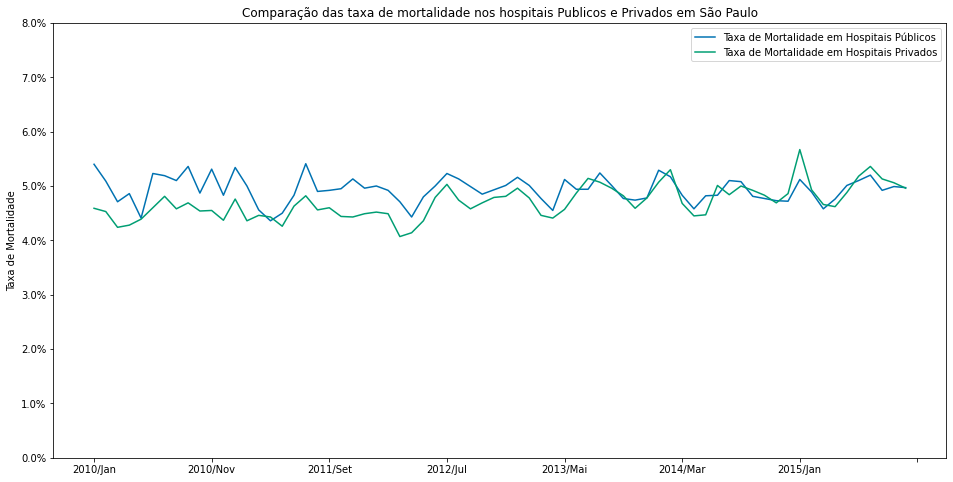

In [196]:
ax = taxa_mortalidade_publica.loc["35 São Paulo"].T.plot(figsize=(16,8), ylabel="Taxa de Mortalidade" )
taxa_mortalidade_privada.loc["35 São Paulo"].T.plot(ax=ax)
ax.legend(["Taxa de Mortalidade em Hospitais Públicos", "Taxa de Mortalidade em Hospitais Privados"])
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
plt.title('Comparação das taxas de mortalidade nos hospitais Publicos e Privados em São Paulo')
plt.style.use('seaborn-colorblind')
plt.ylim(0,8)
plt.show()

### Podemos analisar em São Paulo em que houve uma piora nos hospitais particulares de 4,6% para 5% no final de 2015. Enquanto que nos hospitais publicos teve uma melhora de 5,4% para 5% no mesmo perído.
### Percebi também um pico sazional em janeiro de 2015 de 5,6% na taxa dos hospitais particulares, enquanto que no hospital publico foi menor, 5%, mas acompanhando a sazonalidade do setor privado.

##Seguindo a análise pelo Sudeste (Maior taxa Público), escolhi o Rio de Janeiro



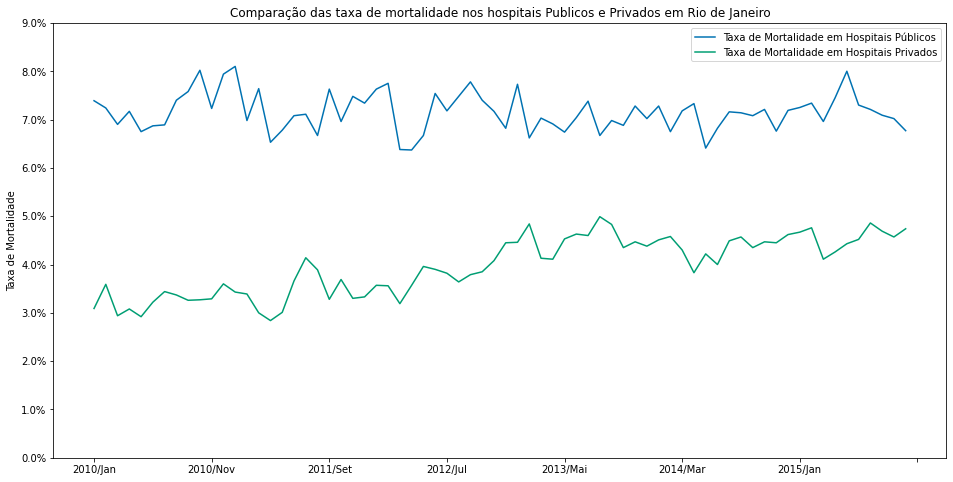

In [197]:
ax = taxa_mortalidade_publica.loc["33 Rio de Janeiro"].T.plot(figsize=(16,8), ylabel="Taxa de Mortalidade" )
taxa_mortalidade_privada.loc["33 Rio de Janeiro"].T.plot(ax=ax)
ax.legend(["Taxa de Mortalidade em Hospitais Públicos", "Taxa de Mortalidade em Hospitais Privados"])
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
plt.title('Comparação das taxas de mortalidade nos hospitais Publicos e Privados em Rio de Janeiro')
plt.style.use('seaborn-colorblind')
plt.ylim(0,9)
plt.show()

###Podemos analisar no Rio de Janeiro uma diferença de 2% dos hospitais particulares e públicos, no qual o setor privado tem uma menor taxa de mortalidade.

##Proxima análise é pelo Sul (Maior taxa Privado), escolhi o Rio Grande do Sul

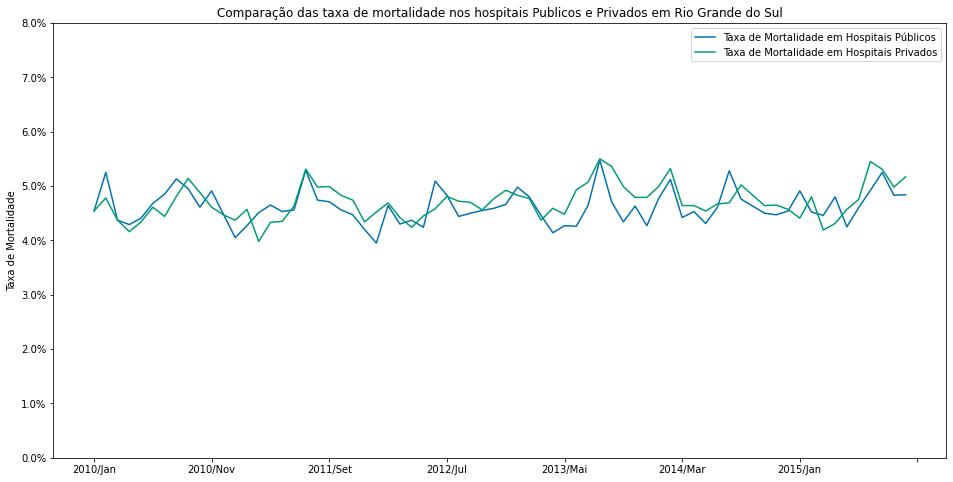

In [198]:
ax = taxa_mortalidade_publica.loc["43 Rio Grande do Sul"].T.plot(figsize=(16,8), ylabel="Taxa de Mortalidade" )
taxa_mortalidade_privada.loc["43 Rio Grande do Sul"].T.plot(ax=ax)
ax.legend(["Taxa de Mortalidade em Hospitais Públicos", "Taxa de Mortalidade em Hospitais Privados"])
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
plt.title('Comparação das taxas de mortalidade nos hospitais Publicos e Privados em Rio Grande do Sul')
plt.style.use('seaborn-colorblind')
plt.ylim(0,8)
plt.show()

### Analisando o Rio Grande do Sul apesar de fazer parte da região com maior taxa de mortalidade dos hospitais particulares, nesse estado mantem praticamente o mesmo patamar em percentual do setor público

## Análise da Região Norte (Menor taxa tanto no Setor Público quanto Privado), escolhi o Pará e o Amapá

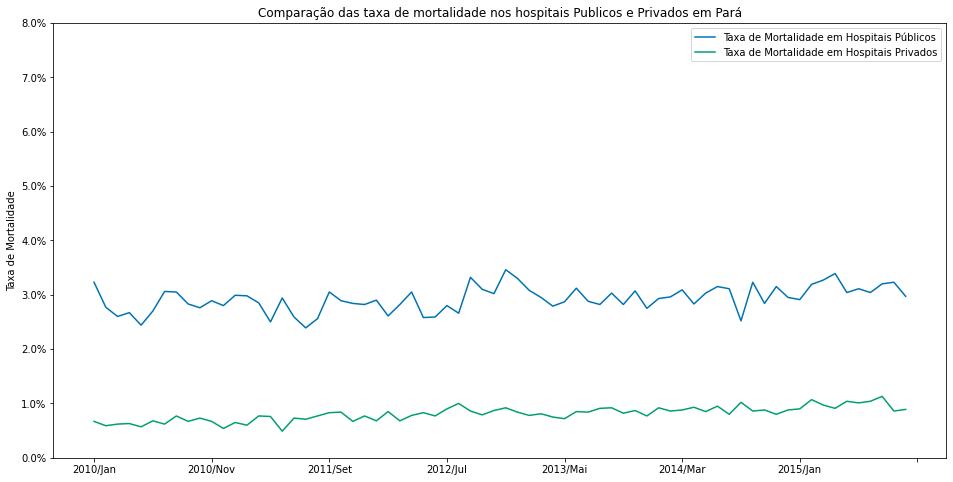

In [199]:
ax = taxa_mortalidade_publica.loc["15 Pará"].T.plot(figsize=(16,8), ylabel="Taxa de Mortalidade" )
taxa_mortalidade_privada.loc["15 Pará"].T.plot(ax=ax)
ax.legend(["Taxa de Mortalidade em Hospitais Públicos", "Taxa de Mortalidade em Hospitais Privados"])
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
plt.title('Comparação das taxas de mortalidade nos hospitais Publicos e Privados em Pará')
plt.style.use('seaborn-colorblind')
plt.ylim(0,8)
plt.show()

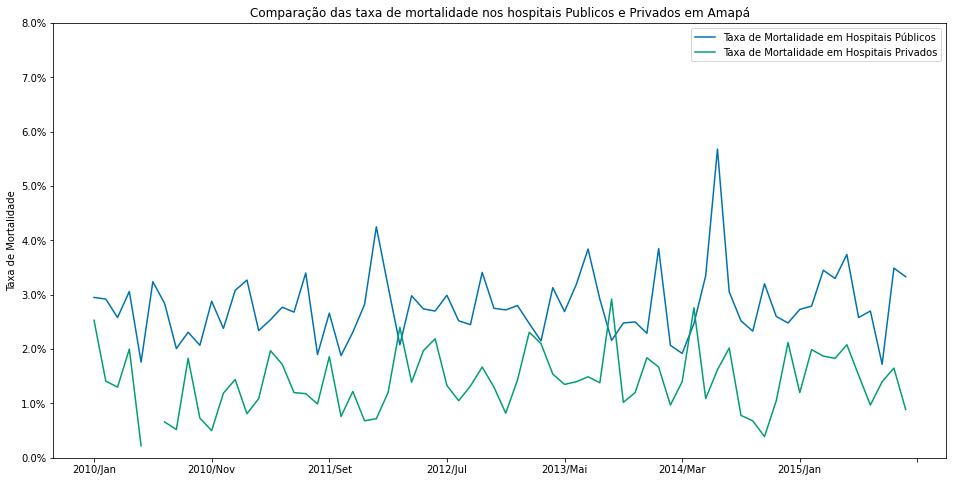

In [200]:
ax = taxa_mortalidade_publica.loc["16 Amapá"].T.plot(figsize=(16,8), ylabel="Taxa de Mortalidade" )
taxa_mortalidade_privada.loc["16 Amapá"].T.plot(ax=ax)
ax.legend(["Taxa de Mortalidade em Hospitais Públicos", "Taxa de Mortalidade em Hospitais Privados"])
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
plt.title('Comparação das taxas de mortalidade nos hospitais Publicos e Privados em Amapá')
plt.style.use('seaborn-colorblind')
plt.ylim(0,8)
plt.show()

### No Pará temos a mesma diferença em percentual do Rio de Janeiro de 2% dos hospitais particulares em relação aos públicos 
### Enquanto que no Amapá, apesar de ter essa mesma diferença de 2%, temos encontros sazonais das taxas, como no começo de 2012 e março de 2014, por exemplo. Também em vista o pico de quase 6% em 2014

#2º Parte da Análise - Tempo Médio de internação

## Para a segunda parte serei mais objetivo, seguindo a ordem da primeira análise(SP, RJ, RS, PA, AP)

In [188]:
#Importando os dados de tempo médio de permanência de internações em hospitais públicos
URL = 'https://raw.githubusercontent.com/Topein/Projeto-1-Bootcamp-Data-Science/main/Dados/Media_Permanencia_Publica.csv'
permanencia_publico = pd.read_csv(URL, encoding="ISO-8859-1",
                    skiprows = 4, sep=";",skipfooter= 12, 
                    thousands= ".", decimal= ",",index_col=0, engine = 'python').drop('Total', axis=1) #Setando o índice e excluindo a Coluna total, 

#Tratando os dados Importados

permanencia_publico = permanencia_publico.replace('-', np.nan) #substituindo os dados '-' Inexistentes por Nulos (nan)
permanencia_publico = permanencia_publico.astype('float64') #mudand as colunas para o tipo

permanencia_publico.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,2013/Nov,2013/Dez,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,2014/Out,2014/Nov,2014/Dez,2015/Jan,2015/Fev,2015/Mar,2015/Abr,2015/Mai,2015/Jun,2015/Jul,2015/Ago,2015/Set,2015/Out
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,3.00,3.50,2.90,3.10,3.20,3.10,3.70,4.10,4.00,3.90,3.90,3.70,3.70,3.30,3.60,3.40,3.50,3.70,3.90,3.70,3.70,3.60,3.90,3.80,3.50,3.30,3.50,3.60,3.70,4.10,4.10,4.30,4.30,3.80,4.10,4.00,4.10,3.90,3.70,3.90,...,4.40,4.00,4.20,4.00,4.10,3.90,4.30,4.50,4.60,4.80,4.60,4.30,4.80,4.60,4.60,4.50,4.60,4.40,4.40,4.40,4.20,4.20,4.30,4.50,4.40,4.20,4.30,4.40,4.10,4.20,4.40,4.60,4.60,4.20,4.60,4.70,4.80,4.70,4.60,4.80
12 Acre,3.60,4.90,4.80,4.70,5.10,4.60,4.90,4.90,5.10,4.70,4.40,4.60,5.10,4.50,4.40,4.70,4.90,4.70,4.80,4.40,nan,4.60,4.10,5.20,4.90,4.40,4.70,4.30,4.60,4.40,4.70,4.90,4.50,4.40,4.30,5.30,5.10,4.50,4.60,4.60,...,5.00,4.50,4.80,5.10,4.90,4.80,5.20,5.50,4.80,5.00,4.90,4.70,5.60,5.30,4.80,5.10,5.10,4.70,5.30,4.90,4.90,5.10,5.00,4.60,5.30,5.40,5.10,5.10,5.10,5.70,4.90,5.20,4.90,5.00,5.00,5.20,4.90,4.90,5.10,5.10
13 Amazonas,4.80,4.80,4.80,4.60,4.90,4.90,4.90,4.90,5.00,4.80,4.60,4.70,4.90,4.50,4.60,4.80,4.90,4.90,4.90,4.60,4.80,4.90,5.00,5.10,5.10,4.50,4.50,4.60,4.80,4.90,4.80,4.80,4.80,4.70,4.80,4.90,4.70,4.90,4.70,5.00,...,5.00,5.10,5.10,5.20,4.90,4.90,5.00,5.00,4.90,5.00,4.80,5.00,5.00,5.10,5.00,5.00,4.90,4.90,4.60,4.90,5.10,5.00,5.10,4.90,5.10,4.90,5.00,4.90,4.90,5.20,4.80,5.30,4.90,5.10,5.00,4.90,5.00,5.00,5.10,4.90
14 Roraima,4.50,4.60,4.70,5.60,4.50,4.80,4.40,4.60,5.20,5.00,4.80,4.70,4.80,4.40,5.00,4.60,4.60,4.70,4.40,4.80,4.40,4.90,4.60,5.50,4.70,5.10,4.80,5.00,5.00,4.90,5.10,5.20,5.00,5.80,5.60,5.60,5.80,4.90,4.80,4.30,...,5.10,5.00,4.80,4.80,4.60,4.80,5.60,4.80,4.50,4.80,4.20,4.70,4.80,4.40,4.50,4.80,4.90,4.90,5.20,4.40,4.60,5.20,4.90,4.70,5.00,5.30,5.20,5.10,4.50,4.90,4.90,5.30,5.30,5.50,5.00,4.70,5.10,5.40,4.60,5.30
15 Pará,4.00,4.10,4.50,4.20,4.60,4.40,4.70,4.70,4.80,4.50,4.50,4.80,4.80,4.40,4.60,4.50,4.50,4.40,4.50,4.40,4.60,4.50,4.40,4.50,4.40,4.40,4.40,4.40,4.30,4.30,4.40,4.70,4.50,4.40,4.40,4.50,4.50,4.50,4.30,4.50,...,4.50,4.30,4.50,4.60,4.60,4.70,4.30,4.30,4.30,4.30,4.30,4.60,4.30,4.30,4.40,4.40,4.40,4.40,4.40,4.30,4.50,4.30,4.40,4.60,4.70,4.50,4.50,4.60,4.50,4.60,4.50,4.70,4.60,4.50,4.50,4.50,4.70,4.70,4.60,4.50


In [189]:
#Importando os dados de tempo médio de permanência de internações em hospitais particulares
URL = 'https://raw.githubusercontent.com/Topein/Projeto-1-Bootcamp-Data-Science/main/Dados/Media_Permanencia_Privada.csv'
permanencia_privada = pd.read_csv(URL, encoding="ISO-8859-1",
                    skiprows = 4, sep=";",skipfooter= 12, 
                    thousands= ".", decimal= ",",index_col=0, engine = 'python').drop('Total', axis=1) #Setando o índice e excluindo a Coluna total, 

#Tratando os dados Importados

permanencia_privada = permanencia_privada.replace('-', np.nan) #substituindo os dados '-' Inexistentes por Nulos (nan)
permanencia_privada = permanencia_privada.astype('float64') #mudand as colunas para o tipo

permanencia_privada.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,2013/Nov,2013/Dez,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,2014/Out,2014/Nov,2014/Dez,2015/Jan,2015/Fev,2015/Mar,2015/Abr,2015/Mai,2015/Jun,2015/Jul,2015/Ago,2015/Set,2015/Out
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,2.30,5.00,1.90,2.20,2.90,2.20,8.60,6.00,6.70,7.50,5.10,6.90,14.40,5.10,4.90,6.90,4.60,5.20,4.10,4.20,4.40,4.60,4.60,4.00,5.10,4.20,4.60,5.60,4.80,4.20,3.70,3.60,3.70,4.60,4.70,6.20,5.20,3.90,7.90,4.80,...,4.70,8.00,6.10,5.00,3.90,7.50,6.80,6.50,6.30,4.80,6.70,5.90,8.60,6.10,5.60,6.80,7.50,7.10,6.20,6.30,6.10,6.30,6.10,7.00,5.60,5.70,6.20,5.40,5.90,5.40,5.80,5.90,5.30,6.00,5.50,6.70,5.50,6.00,6.50,6.20
12 Acre,3.30,3.70,3.00,3.30,3.40,2.60,2.90,3.00,3.20,2.80,2.80,2.80,2.80,2.90,3.10,3.20,2.90,3.30,3.70,3.00,nan,3.20,3.20,3.60,3.50,3.30,2.70,3.10,3.40,3.20,3.20,3.50,3.50,3.30,3.30,3.20,3.50,3.00,3.30,3.10,...,3.60,3.20,3.00,3.10,3.50,3.30,3.00,3.50,4.00,3.50,3.60,3.80,3.40,3.40,3.20,3.20,2.90,2.90,3.10,3.80,3.30,2.80,3.00,3.20,2.90,3.20,3.20,3.30,3.30,3.60,3.30,3.20,3.60,3.40,3.70,3.90,3.50,3.80,3.50,3.60
13 Amazonas,2.50,3.60,3.30,4.70,4.40,4.80,4.30,4.90,4.40,4.20,2.70,4.50,4.70,4.60,4.20,4.20,4.00,4.50,4.60,3.90,5.00,3.80,3.80,4.30,4.80,4.50,3.80,3.70,3.40,4.40,4.60,6.40,6.20,3.80,4.40,6.40,6.50,5.30,5.30,6.50,...,6.00,6.30,9.00,4.80,4.60,5.00,5.70,5.70,5.90,6.30,5.30,5.00,5.80,4.90,6.30,6.50,6.50,5.70,6.20,6.70,6.70,5.40,6.10,5.80,5.90,5.90,5.80,6.10,6.50,5.60,6.30,6.40,6.20,6.10,6.10,5.80,7.00,6.70,7.10,6.20
14 Roraima,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,7.70,8.80,10.20,8.40,9.50,9.30,8.70,nan,9.60,8.30,10.40,10.20,13.80,10.40,12.50
15 Pará,3.00,3.10,3.10,3.10,3.20,3.20,3.10,3.10,3.20,3.20,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.90,2.90,3.00,2.80,2.90,2.90,2.90,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.90,3.00,3.10,...,3.10,3.00,3.10,3.00,3.00,3.00,2.90,2.90,3.00,3.00,3.00,3.00,3.00,3.10,3.10,3.00,2.90,3.00,3.00,2.90,3.00,3.10,3.00,3.10,3.10,3.10,3.10,3.00,2.90,3.00,3.00,3.10,3.10,3.00,3.10,3.10,3.10,3.10,3.00,2.90


##Não precisarei efetuar o corte dos meses, pois não há dados faltantes em ambas as bases, como na primeira análise.

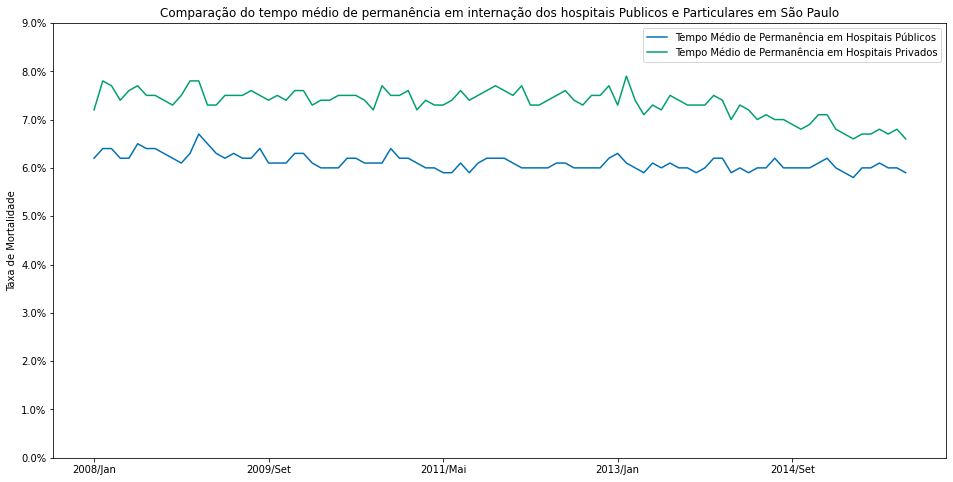

In [201]:
ax = permanencia_publico.loc["35 São Paulo"].T.plot(figsize=(16,8), ylabel="Taxa de Mortalidade" )
permanencia_privada.loc["35 São Paulo"].T.plot(ax=ax)
ax.legend(["Tempo Médio de Permanência em Hospitais Públicos", "Tempo Médio de Permanência em Hospitais Privados"])
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
plt.title('Comparação do tempo médio de permanência em internação dos hospitais Publicos e Particulares em São Paulo')
plt.style.use('seaborn-colorblind')
plt.ylim(0,9)
plt.show()

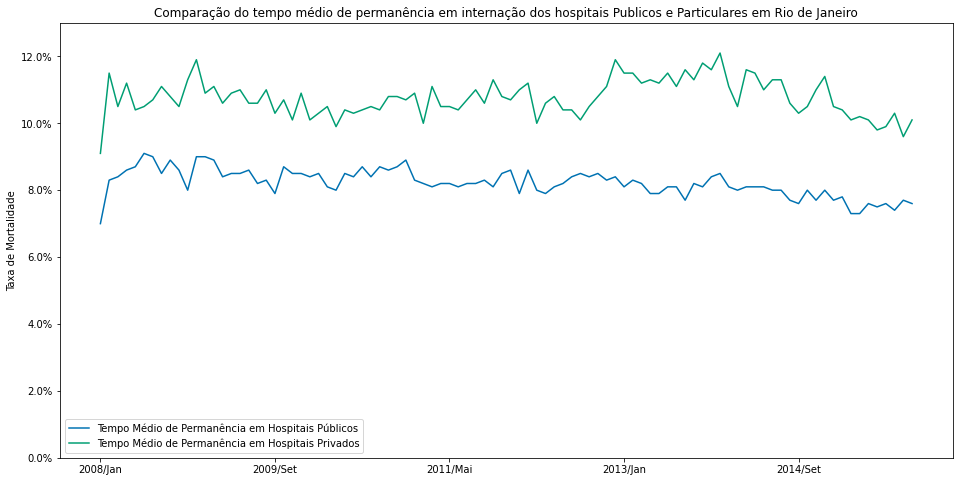

In [202]:
ax = permanencia_publico.loc["33 Rio de Janeiro"].T.plot(figsize=(16,8), ylabel="Taxa de Mortalidade" )
permanencia_privada.loc["33 Rio de Janeiro"].T.plot(ax=ax)
ax.legend(["Tempo Médio de Permanência em Hospitais Públicos", "Tempo Médio de Permanência em Hospitais Privados"])
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
plt.title('Comparação do tempo médio de permanência em internação dos hospitais Publicos e Particulares em Rio de Janeiro')
plt.style.use('seaborn-colorblind')
plt.ylim(0,13)
plt.show()

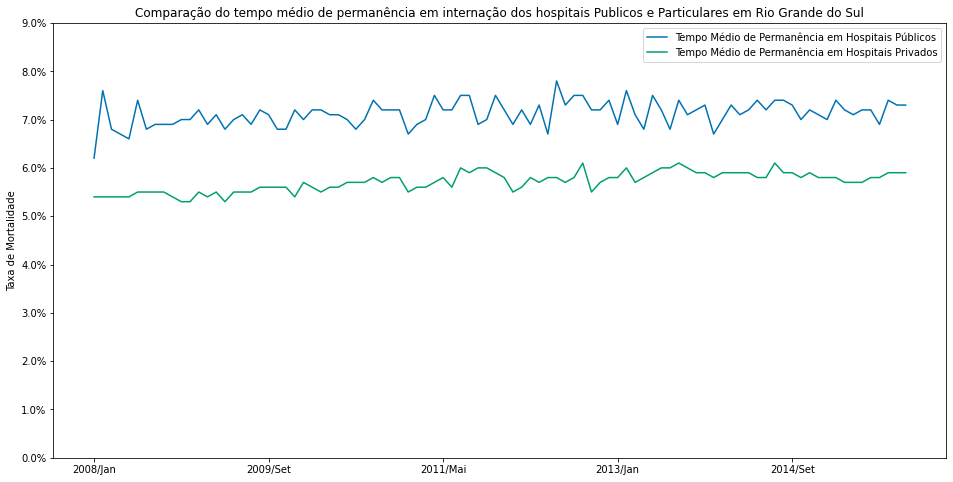

In [203]:
ax = permanencia_publico.loc["43 Rio Grande do Sul"].T.plot(figsize=(16,8), ylabel="Taxa de Mortalidade" )
permanencia_privada.loc["43 Rio Grande do Sul"].T.plot(ax=ax)
ax.legend(["Tempo Médio de Permanência em Hospitais Públicos", "Tempo Médio de Permanência em Hospitais Privados"])
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
plt.title('Comparação do tempo médio de permanência em internação dos hospitais Publicos e Particulares em Rio Grande do Sul')
plt.style.use('seaborn-colorblind')
plt.ylim(0,9)
plt.show()

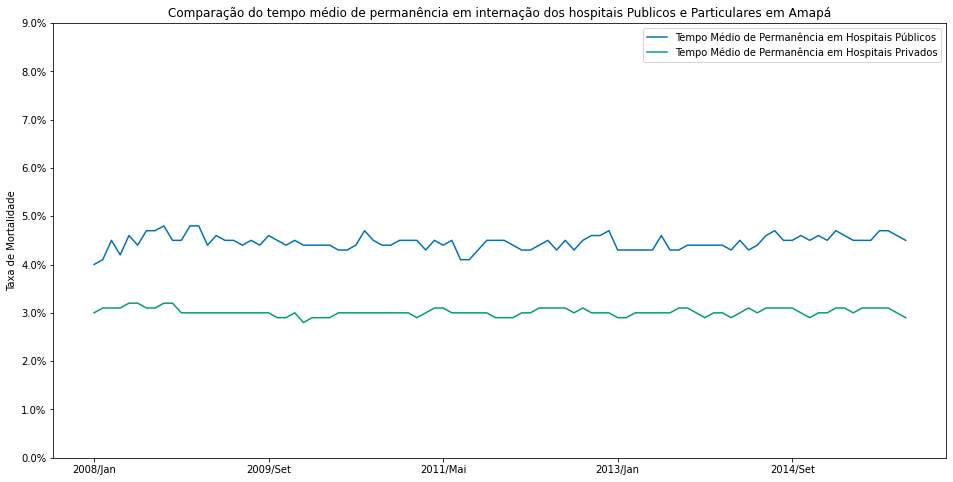

In [204]:
ax = permanencia_publico.loc["15 Pará"].T.plot(figsize=(16,8), ylabel="Taxa de Mortalidade" )
permanencia_privada.loc["15 Pará"].T.plot(ax=ax)
ax.legend(["Tempo Médio de Permanência em Hospitais Públicos", "Tempo Médio de Permanência em Hospitais Privados"])
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
plt.title('Comparação do tempo médio de permanência em internação dos hospitais Publicos e Particulares em Amapá')
plt.style.use('seaborn-colorblind')
plt.ylim(0,9)
plt.show()

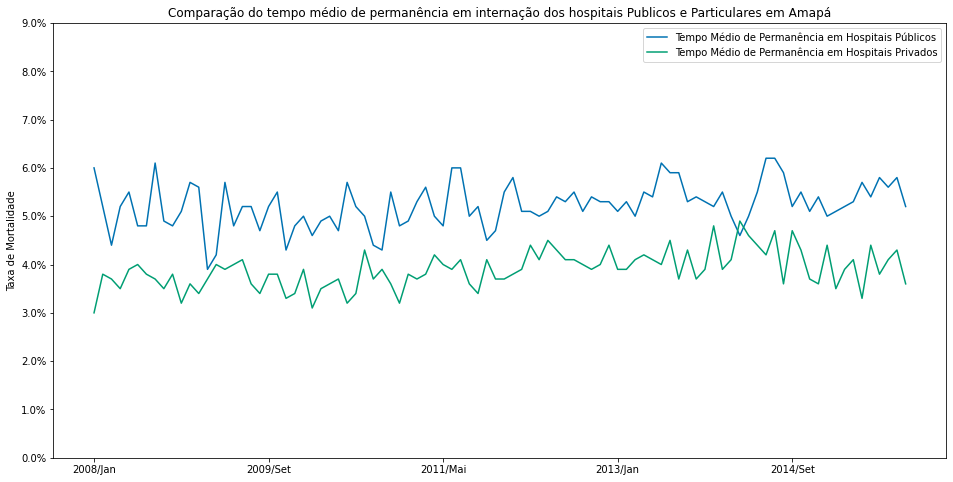

In [205]:
ax = permanencia_publico.loc["16 Amapá"].T.plot(figsize=(16,8), ylabel="Taxa de Mortalidade" )
permanencia_privada.loc["16 Amapá"].T.plot(ax=ax)
ax.legend(["Tempo Médio de Permanência em Hospitais Públicos", "Tempo Médio de Permanência em Hospitais Privados"])
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
plt.title('Comparação do tempo médio de permanência em internação dos hospitais Publicos e Particulares em Amapá')
plt.style.use('seaborn-colorblind')
plt.ylim(0,9)
plt.show()

### Com exceção da região sudeste, em todos os outro gráficos podemos ver que o tempo médio de internações nos hospitais públicos são maiores que nos hospitais privados seguindo uma média e uma linha sazonal.

#Conclusão
  Seguindo as variáveis taxa de mortalidade e tempo médio de permanência podemos concluir que o setor privado possue um sistema de saúde mais eficiente em resultados. Levando em conta que nos estados Rio Grande do Sul, Pará e Amapá análisados, tem menor taxa de mortalidade e menor tempo de permanência no setor privado. Enquanto nas grande metropoles, São Paulo e Rio de Janeiro, apesar de o tempo de permanencia ser maior a taxa de mortalidade é menor. Provando assim a diferença em eficiência dos setores.